# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1031.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           3.60e-42
Time:                        14:48:33   Log-Likelihood:                 4.9748
No. Observations:                  50   AIC:                            -1.950
Df Residuals:                      46   BIC:                             5.699
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0541      0.078     64.928      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.56733407  5.0223267   5.44125875  5.79941602  6.08100351  6.28174054
  6.40956405  6.48332454  6.52968904  6.57875976  6.65912838  6.79317856
  6.9934083   7.26037661  7.58261166  7.93849552  8.29981599  8.63640176
  8.92107943  9.1341381   9.26656775  9.3215396   9.31388505  9.26765897
  9.21218752  9.17724995  9.18818595  9.26173243  9.40327369  9.60595675
  9.85181735 10.11473136 10.36470693 10.57281209 10.71592814 10.78054801
 10.76499546 10.67970043 10.54548547 10.39014464 10.24387703 10.13432512
 10.08203323 10.09707209 10.17738432 10.3091224  10.46892379 10.62774934
 10.75565432 10.8267083 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.81130559 10.67549188 10.43705092 10.13650959  9.82721553  9.5622758
  9.38155436  9.30191202  9.31307835  9.38016617]


## Plot comparison

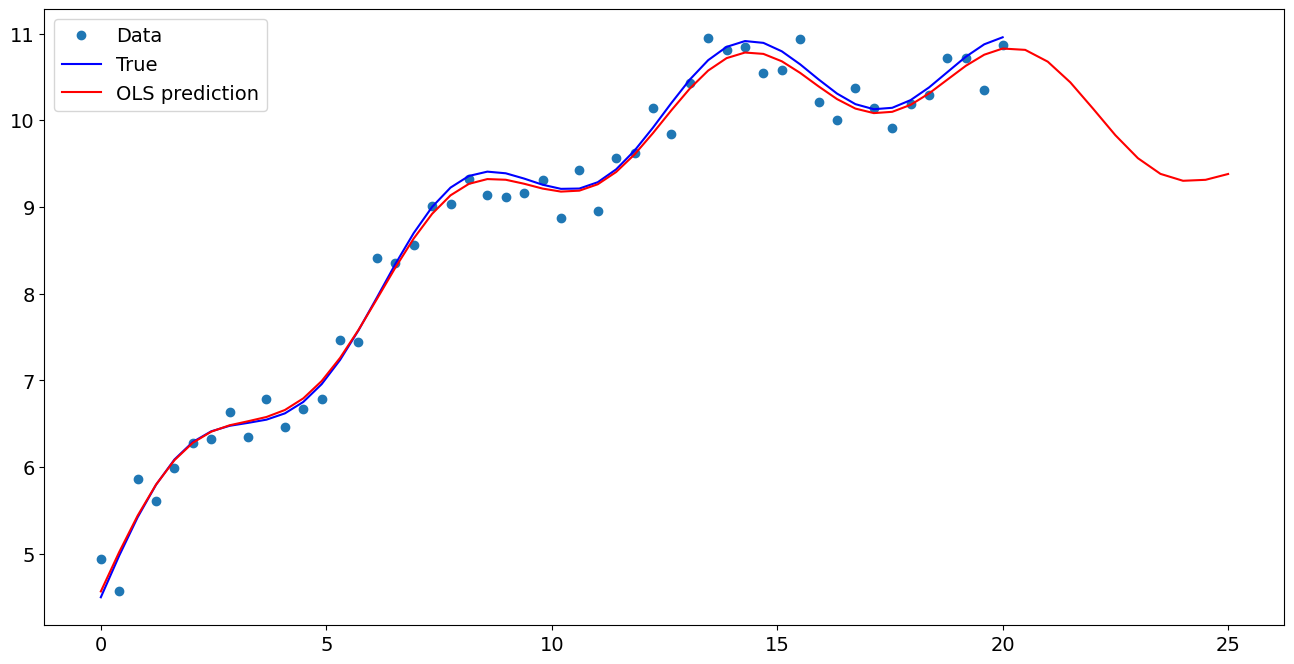

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.054107
x1                  0.486978
np.sin(x1)          0.453479
I((x1 - 5) ** 2)   -0.019471
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.811306
1    10.675492
2    10.437051
3    10.136510
4     9.827216
5     9.562276
6     9.381554
7     9.301912
8     9.313078
9     9.380166
dtype: float64